<a href="https://colab.research.google.com/github/raspopovaa/Pet-Project-Data-Analyst/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта



Вас пригласили на стажировку в отдел маркетинговой аналитики.***Наша цель: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.***
Есть данные с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вам предстоит изучить:
как клиенты пользуются сервисом,
когда делают первые покупки на сайте,
сколько денег приносит компании каждый клиент,
когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.

## Загрузите данные и подготовьте их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import calendar

# открываем файлы
! gdown --id 1TM-i15kfRuMFp1uFd1mIQVwluDT2xID6
! gdown --id 1BF94inAdCYqO7oC248hVRfniqvfxghdQ
! gdown --id 19UqXKj2MD7p1yHxu4r3ElULw-z2CAxvr

try:
    visits = pd.read_csv('/content/visits_log.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log.csv')
try:
    orders = pd.read_csv('/content/orders_log.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log.csv')
try:
    costs = pd.read_csv('/content/costs.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs.csv')
# устанавливаем отображение количества столбцов экране 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format # устанавливаем отображение числа знаков после точки.
import warnings
warnings.filterwarnings('ignore')

Downloading...
From: https://drive.google.com/uc?id=1TM-i15kfRuMFp1uFd1mIQVwluDT2xID6
To: /content/visits_log.csv
100% 25.1M/25.1M [00:00<00:00, 132MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1BF94inAdCYqO7oC248hVRfniqvfxghdQ
To: /content/orders_log.csv
100% 2.29M/2.29M [00:00<00:00, 195MB/s]
Downloading...
From: https://drive.google.com/uc?id=19UqXKj2MD7p1yHxu4r3ElULw-z2CAxvr
To: /content/costs.csv
100% 49.3k/49.3k [00:00<00:00, 42.3MB/s]


Изучим таблицу visits.

In [2]:
visits.info()
visits.tail(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
359390,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,18268369011883553090
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866
359392,desktop,2017-12-30 21:49:19,4,2017-12-30 21:49:00,18311497973035795342
359393,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


Пропусков нет. Видиим что столбцы End Ts и Start Ts имеют неверный тип данный. Нужно изменить тип на datetime. Так же обратим внимание на название столбцов. Напишем их строчными буквами а пробели заменим на нижнее подчеркивание.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, пропусков нет, но нужно изменитьтип данных.
</div>

In [3]:
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id','Start Ts':'start_ts', 'Uid':'uid'}, inplace=True)
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits['end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
Name: end_ts, dtype: object

Изменяем тип данных на datetime

In [5]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%dT%H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%dT%H:%M:%S')

  В столбце device всего два значения. предлагаю перевести тип этого столбца в категориальный.

In [6]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

Строковая переменная, состоит только из нескольких разных значений. Преобразование такой строковой переменной в категориальную переменную сэкономит некоторую память.

In [7]:
visits['device']=visits['device'].astype('category')

In [8]:
visits.info()
visits.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


Те же действия проводим с таблицами orders и costs.

In [9]:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.000,10329302124590727494
1,2017-06-01 00:25:00,0.550,11627257723692907447
2,2017-06-01 00:27:00,0.370,17903680561304213844
3,2017-06-01 00:29:00,0.550,16109239769442553005
4,2017-06-01 07:58:00,0.370,14200605875248379450
5,2017-06-01 08:43:00,0.180,10402394430196413321
6,2017-06-01 08:54:00,1.830,12464626743129688638
7,2017-06-01 09:22:00,1.220,3644482766749211722
8,2017-06-01 09:22:00,3.300,17542070709969841479
9,2017-06-01 09:23:00,0.370,1074355127080856382


In [10]:
orders.columns = orders.columns.str.lower()
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%dT%H:%M:%S')
orders.info()
orders.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.000,10329302124590727494
1,2017-06-01 00:25:00,0.550,11627257723692907447
2,2017-06-01 00:27:00,0.370,17903680561304213844
3,2017-06-01 00:29:00,0.550,16109239769442553005
4,2017-06-01 07:58:00,0.370,14200605875248379450
5,2017-06-01 08:43:00,0.180,10402394430196413321
6,2017-06-01 08:54:00,1.830,12464626743129688638
7,2017-06-01 09:22:00,1.220,3644482766749211722
8,2017-06-01 09:22:00,3.300,17542070709969841479
9,2017-06-01 09:23:00,0.370,1074355127080856382


In [11]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [12]:
orders = orders[orders['buy_ts'] != '2018-06-01 00:02:00']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%dT%H:%M:%S')
orders['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

При просмотре дат заказов обратил внимание на то, что последний месяц представлен только одним заказом от 2018-06-01 00:02:00. Это может повлиять на анализ, так как созданная когорта по этому месяцу будет представлена только одной транзакцией, да и период в задании указан по конец мая 2018 года. Предлагаю удалить этот заказ. 

Посмотрим следующую таблицу.

In [13]:
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.200
1,1,2017-06-02,62.250
2,1,2017-06-03,36.530
3,1,2017-06-04,55.000
4,1,2017-06-05,57.080
5,1,2017-06-06,40.390
6,1,2017-06-07,40.590
7,1,2017-06-08,56.630
8,1,2017-06-09,40.160
9,1,2017-06-10,43.240


In [14]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%dT%H:%M:%S')
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.200
1,1,2017-06-02,62.250
2,1,2017-06-03,36.530
3,1,2017-06-04,55.000
4,1,2017-06-05,57.080
...,...,...,...
2537,10,2018-05-27,9.920
2538,10,2018-05-28,21.260
2539,10,2018-05-29,11.320
2540,10,2018-05-30,33.150


В данной таблице изменили данные на даты.

Провериим таблицы на дубликаты.

In [16]:
costs.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
visits.duplicated().sum()

0

### Вывод

Использовав метод info и head, мы визуально оценили данные в трех наблицах - visits, orders и costs . После наших преобразований во всех трех таблицах столбцы имеют необходимый тип данных. Таблицы удобные для анализа данных - в каждом столбце таблиц хранятся значения, каждая строка содержит одно наблюдение, к которому привязаны значения разных переменных. Название столбцов без пробелов, несколько слов разделяются нижним подчеркиванием, на одном языке и в одном регистре, отображают в краткой форме какого рода информация содержится в каждом столбце. Пропусков не наблюдаем. В талице orders удалили одну строчку, для исключения искажения результатов анализа. Данные готовы для расчета метрик. 

<div class="alert alert-block alert-info">
Дубликаты отсутствуют.
</div>

## Рассчитайте метрики и постройте графики

### Продуктовые метрики

Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках.

То, что сначала выглядит как набор китайских транскрипций, после небольшого разбора становится, в действительно очень понятным, легким, а самое главное полезным механизмов. Это Day/Week/Month Active Users - то есть дневная/недельная/месячная активная аудитория.

DAU/WAU/MAU - популярная метрика вовлеченности пользователей - это отношение количества ежедневных активных пользователей к количеству ежемесячных активных пользователей, выраженное в процентах. Обычно считается, что более 20% - это хорошо, а 50%+ - это мировой уровень.

Важно определить, какое действие пользователь должен совершить в вашем бизнесе, чтобы быть определенным как "активный" пользователь, поскольку оно не одинаково для каждого бизнеса. Является ли активным пользователем тот, кто входит в систему? Или это тот, кто совершает более конкретное действие с вашим продуктом, например, читает статью, отправляет запрос или комментарий, скачивает документ и т.д.

In [19]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


In [20]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_week'] = visits['start_ts'].dt.week
visits['session_month']  = visits['start_ts'].dt.month
visits['session_date'] = visits['start_ts'].dt.date

In [21]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

In [22]:
print(f'DAU - количество уникальных пользователей в день: {int(dau_total)}')
print(f'WAU - количество уникальных пользователей в неделю: {int(wau_total)}') 
print(f'MAU - количество уникальных пользователей в месяц: {int(mau_total)}') 

DAU - количество уникальных пользователей в день: 907
WAU - количество уникальных пользователей в неделю: 5716
MAU - количество уникальных пользователей в месяц: 23228


In [23]:
dau = visits.groupby('session_date', as_index=False).agg({'uid': 'nunique'})#.reset_index()
dau.columns

Index(['session_date', 'uid'], dtype='object')

In [24]:

fig = px.line(dau, x="session_date", y="uid", markers=True, )
fig.update_layout(title= '<b>Количество уникальных пользователей в день</b>',
                   xaxis_title='Месяц',
                   yaxis_title='Количество пользователей',
                  )
fig.show()

На графике выдим резкое увеличение пользователей 24 ноября 2017. Могу предположить такое увеличение связанно с празднованием нового года. Минимальное количество в конце марта 2018, с чем это связанно затрудняюсь ответить. Скорее всего случайность. Нужно посмотреть на данные других лет.

In [25]:
wau = visits.groupby(['session_year', 'session_week'],as_index=False).agg({'uid': 'nunique'})
wau

,session_year,session_week,uid
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064
5,2017,27,3294
6,2017,28,4355
7,2017,29,3841
8,2017,30,2655
9,2017,31,2364


In [26]:

fig = px.line(wau, x="session_week", y="uid", markers=True, color='session_year')
fig.update_layout(title= '<b>Количество уникальных пользователей в неделю</b>',
                   xaxis_title='Неделя',
                   yaxis_title='Количество пользователей',
                  )
fig.show()

Рассмотрев изменения по недельно видим более сглаженную картину. Рассуждая логически можно придти к выводу о сезонности количеста посещений сайта. Летом количество посетителей минимально, начиная с осени идет рост, достигая максимальных значений в конце ноября, зимой и осенью количество пользователей постепенно снижаеться до минимальных значений лета.

In [27]:
mau=visits.groupby(['session_year', 'session_month'],as_index=False).agg({'uid': 'nunique'})

In [28]:
fig = px.line(mau, x="session_month", y="uid", markers=True, color='session_year')
fig.update_layout(title= '<b>Количество уникальных пользователей в месяц</b>',
                   xaxis_title='Месяц',
                   yaxis_title='Количество пользователей',
                  )
fig.show()

Помесячные показатели только подтверждают мои слова сказанные выше.

Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

In [29]:
dau_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
dau_per_user.columns = ['n_session', 'n_uid']
dau_per_user['ses_per_user'] = dau_per_user['n_session'] / dau_per_user['n_uid']
dau_per_user

,n_session,n_uid,ses_per_user
session_date,,,
2017-06-01,664,605,1.098
2017-06-02,658,608,1.082
2017-06-03,477,445,1.072
2017-06-04,510,476,1.071
2017-06-05,893,820,1.089
...,...,...,...
2018-05-27,672,620,1.084
2018-05-28,1156,1039,1.113
2018-05-29,1035,948,1.092


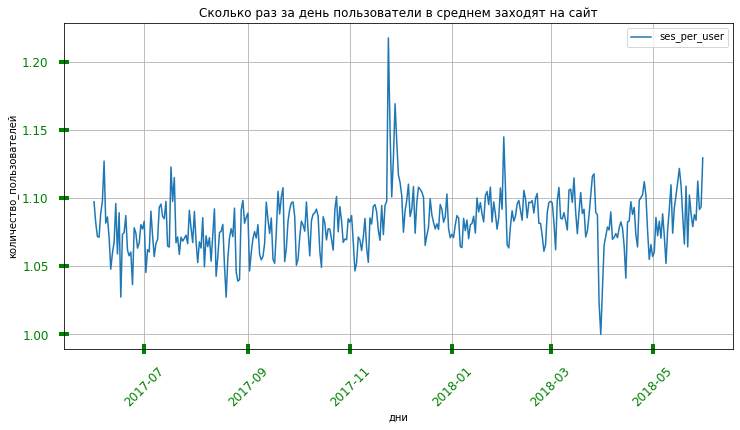

В среднем в день на одного пользователя приходится 1.08 сессий


In [30]:

dau_per_user['ses_per_user'].plot(figsize=(12,6), title ='Cколько раз за день пользователи в среднем заходят на сайт')
plt.ylabel('количество_пользователей')
plt.xlabel('дни')
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 10,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'g',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 12,    #  Размер подписи
               labelcolor = 'g'    #  Цвет подписи
             )    #  Поворот подписей


plt.legend()
plt.xticks(rotation = 45) 
plt.grid(True)
plt.show()
print('В среднем в день на одного пользователя приходится {} сессий'.format(round(dau_per_user['ses_per_user'].mean(),2)))

In [31]:
dau_ses_per_user = dau_per_user['ses_per_user'].reset_index()
dau_ses_per_user

,session_date,ses_per_user
0,2017-06-01,1.098
1,2017-06-02,1.082
2,2017-06-03,1.072
3,2017-06-04,1.071
4,2017-06-05,1.089
...,...,...
359,2018-05-27,1.084
360,2018-05-28,1.113
361,2018-05-29,1.092
362,2018-05-30,1.094


In [32]:
fig = px.line(dau_ses_per_user, x="session_date", y="ses_per_user", markers=True)
fig.update_layout(title= '<b>Cколько раз за день пользователи в среднем заходят на сайт</b>',
                   xaxis_title='Дата',
                   yaxis_title='Количество значений',
                  )
fig.show()

Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изучим изменение продолжительности сессий во времени.

In [33]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_week,session_month,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,12,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,7,2017-07-01


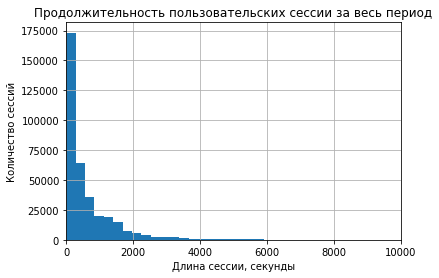

In [34]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds 
visits['session_duration_sec'].hist(bins=300).set(title='Продолжительность пользовательских сессии за весь период', xlabel='Длина сессии, секунды', ylabel='Количество сессий', xlim = (0,10000))
plt.show()


In [35]:
visits['session_duration_sec']

0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration_sec, Length: 359400, dtype: int64

Узнаем продолжительность типичной пользовательской сессии за весь период используя метод mode(), так как распределение не нормальное. Этот метод выведет наболее часто встречающееся значение.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, исходя из того, что распределение далеко отнормального нам нужно в качестве средней меры брать моду.
</div>

In [36]:
asl = visits['session_duration_sec'].mode()
print('Продолжительность типичной пользовательской сессии за весь период - {} sec'.format(int(asl)))

Продолжительность типичной пользовательской сессии за весь период - 60 sec


Типичная продолжительность сессии показывает что она не превышает 1 минуты. Можно предположить, что пользователи заходят на Яндекс.Афишу просто купить билеты. Что в принципе подтверждается и количеством сессий. Пришел, увидел, заказал. Перейдем с следующему показателю.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, скорее всего пользователи заходят на сайт уже определившись с выбором.
</div>

Retention Rate - показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. Рассчитаем Retention Rate, применяя когортный анализ. Покажем изменения метрики во времени на графике. Найдем средний Retention Rate на второй месяц «жизни» когорт. Используя когортный анализ можно понять, как по месяцам изменяется количество пользователей, совершивших покупку впервые. Когда выяснится, растёт число «новичков» или падает, можно будет понять, кто прибыльнее — старые покупатели или новые.

In [37]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_week,session_month,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,7,2017-07-01,0


Начанием создавать когорты. Находим перевое посещение клиента, иеняем типы данных. Соединяем все в общею таблицу.

In [38]:
first_visits_date = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits_date.columns = ['uid','first_month_start_ts']
first_visits_date['first_month_start_ts'] = first_visits_date['first_month_start_ts'].dt.date
first_visits_date['first_month_start_ts'] = first_visits_date['first_month_start_ts'].astype('datetime64[M]')
user_activity = pd.merge(first_visits_date, visits, on='uid')

Создадим в таблице столбец с месяцем визита.

In [39]:

user_activity['session_month'] = pd.to_datetime(user_activity['session_date'], format = '%Y-%m-%dT%H:%M:%S')
user_activity['session_month'] = user_activity['session_month'].astype('datetime64[M]')
user_activity.head()

,uid,first_month_start_ts,device,end_ts,source_id,start_ts,session_year,session_week,session_month,session_date,session_duration_sec
0,11863502262781,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,9,2018-03-01,2018-03-01,360
1,49537067089222,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,6,2018-02-01,2018-02-06,120
2,297729379853735,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,23,2017-06-01,2017-06-07,60
3,313578113262317,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,2018,10,2018-03-01,2018-03-11,360
4,313578113262317,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017,38,2017-09-01,2017-09-18,1080


Создаем столбец с порядковым номером месяца жизни когорты.

In [40]:
user_activity['cohort_lifetime'] = (
    user_activity['session_month']
    - user_activity['first_month_start_ts']
)
user_activity['cohort_lifetime'] = user_activity[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
user_activity['cohort_lifetime'] = (
    user_activity['cohort_lifetime'].round().astype('int')
)


user_activity.head(3)

,uid,first_month_start_ts,device,end_ts,source_id,start_ts,session_year,session_week,session_month,session_date,session_duration_sec,cohort_lifetime
0,11863502262781,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018,9,2018-03-01,2018-03-01,360,0
1,49537067089222,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018,6,2018-02-01,2018-02-06,120,0
2,297729379853735,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017,23,2017-06-01,2017-06-07,60,0


Сгруппируем когорты. Значения в таблице будет количество пользователей. 

In [41]:
cohorts = user_activity.pivot_table(
    index='first_month_start_ts',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique')

cohorts

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month_start_ts,,,,,,,,,,,,
2017-06-01,13259.000,1043.000,713.000,814.000,909.000,947.000,809.000,766.000,694.000,674.000,539.000,596.000
2017-07-01,13140.000,737.000,674.000,738.000,765.000,633.000,596.000,601.000,510.000,376.000,361.000,NaN
2017-08-01,10181.000,783.000,640.000,639.000,510.000,448.000,370.000,402.000,284.000,265.000,NaN,NaN
2017-09-01,16704.000,1428.000,1156.000,847.000,658.000,632.000,599.000,404.000,381.000,NaN,NaN,NaN
2017-10-01,25977.000,2042.000,1357.000,1012.000,890.000,837.000,555.000,529.000,NaN,NaN,NaN,NaN
2017-11-01,27248.000,2133.000,1202.000,1054.000,919.000,638.000,594.000,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.000,1410.000,960.000,786.000,512.000,481.000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.000,1351.000,890.000,565.000,458.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.000,1267.000,565.000,446.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посчитаем коофициет удержания разделив поочередно столбцы с 1 по 11 на знаения столбца 0. Визуализируем результат применив heatmap.

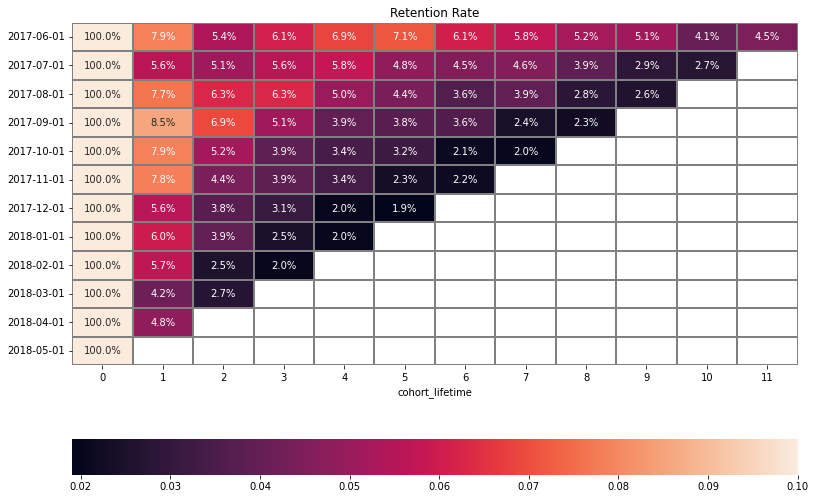

In [44]:
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, cohorts[col] / cohorts[0]], axis=1)
retention.columns = cohorts.columns
retention.index = [str(x)[0:10] for x in retention.index]
plt.figure(figsize=(13,9))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws={'orientation':'horizontal'} ).set(title='Retention Rate')
plt.show()

Посчитаем средний Retention Rate на второй месяц «жизни» когорт 

In [45]:
m =retention[1].mean()
print('Cредний Retention Rate на второй месяц «жизни» когорт - {:.1%}'.format(m))

Cредний Retention Rate на второй месяц «жизни» когорт - 6.5%


<div class="alert alert-block alert-info">
Retention Rate с течением времени снижаеться до 2%.
</div>

#### Вывод

Мы расчитали продуктовые метрики. У нас получилось:

In [46]:
print('DAU - количество уникальных пользователей в день:', int(dau_total))
print('WAU - количество уникальных пользователей в неделю:', int(wau_total)) 
print('MAU - количество уникальных пользователей в месяц:', int(mau_total)) 
print('В среднем в день на одного пользователя приходится {} сессий'.format(round(dau_per_user['ses_per_user'].mean(),2)))
print('Продолжительность типичной пользовательской сессии за весь период - {} sec'.format(int(asl)))
print('Cредний Retention Rate на второй месяц «жизни» когорт - {:.1%}'.format(m))

DAU - количество уникальных пользователей в день: 907
WAU - количество уникальных пользователей в неделю: 5716
MAU - количество уникальных пользователей в месяц: 23228
В среднем в день на одного пользователя приходится 1.08 сессий
Продолжительность типичной пользовательской сессии за весь период - 60 sec
Cредний Retention Rate на второй месяц «жизни» когорт - 6.5%


Так же из графиков мы видим среднее количество сессий распределённых во времении. Мы видим сезонность количеста посещений сайта. Летом количество посетителей минимально, начиная с осени идет рост, достигая максимальных значений в конце ноября, зимой и осенью количество пользователей постепенно снижаеться до минимальных значений лета. Так же мы видим что, на одного пользователя приходтся 1,08 сессии, а её длительность 60 секунд. Cредний Retention Rate на второй месяц «жизни» когорт - 6.5%. Получается 94,5 % клиентов заходят только один раз и больше к нам не возвращаються. Видимо у маркетинга с привлечением клиента все в порядке, клиентов привлеваают, а что покупают эти клиенты и покупают ли вообще? Посмотрим на метрики элетронной коммерции.

### Метрики электронной коммерции

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. 

In [47]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_week,session_month,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,51,12,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,8,2,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,26,7,2017-07-01,0


Создадим в таблице столбец first_visits_date, с датой первого визита пользователя. В таблице users объединим таблицу orders с first_visits_date.

In [48]:
first_orders_date = orders.groupby('uid')['buy_ts'].min()
first_orders_date.name = 'first_orders_date'
orders2 = orders.join(first_orders_date, on='uid')
first_visits_date = visits.groupby('uid')['start_ts'].min()
first_visits_date.name = 'first_visits_date'
users = orders2.join(first_visits_date, on='uid')
users.sample(5)


,buy_ts,revenue,uid,first_orders_date,first_visits_date
28743,2018-01-09 22:16:00,2.140,8281550145771996155,2017-08-06 21:35:00,2017-08-06 21:34:00
33909,2018-02-10 12:20:00,0.730,2129410861262729071,2018-02-10 12:20:00,2018-02-07 19:07:00
35588,2018-02-18 20:43:00,7.330,2403290093062464563,2018-02-18 20:43:00,2017-09-07 13:14:00
4922,2017-08-05 16:00:00,1.220,2012969992309498201,2017-08-05 16:00:00,2017-08-05 15:58:00
1979,2017-06-25 21:33:00,6.720,2374313720248290308,2017-06-25 21:33:00,2017-06-25 21:33:00


In [49]:
users['time_delta'] = (
    users['first_visits_date'] - users['first_orders_date']
)
users['time_delta'] = users[
    'time_delta'
] / np.timedelta64(1, 'm')
users['time_delta'] = users['time_delta'].astype(
    'float').abs()

Сгруппируем таблицу по пользователю. 

In [50]:
users_group = users.pivot_table(index='uid', values='time_delta')

Определим какое время заказа чаще всего встречалось. Определим Моду.

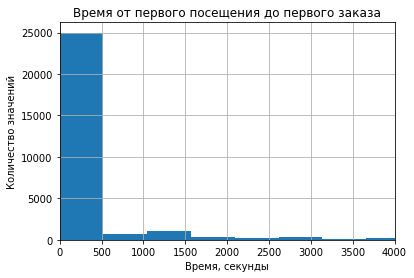

Мода времени заказа после первого посещения пользователя 1 минута


count    50414.000
mean     25369.494
std      66911.370
min          0.000
25%          4.000
50%         22.000
75%       6231.000
max     523144.000
Name: time_delta, dtype: float64

In [51]:
users_group['time_delta'].hist(bins=1000).set(title='Время от первого посещения до первого заказа', xlabel='Время, секунды', ylabel='Количество значений', xlim=(0,4000))
plt.show()
mo=users_group['time_delta'].mode()
print('Мода времени заказа после первого посещения пользователя {} минута'.format(int(mo)))
users['time_delta'].describe()

Больше всего людей делают заказ в первую минуту посещения сайта. Предполагаю что это покупка по акции. Цены - невозможно отказаться.))) Продолжим исследовать метрики.

Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

In [52]:
users.head(2)

,buy_ts,revenue,uid,first_orders_date,first_visits_date,time_delta
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.000
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.000


Добвим в таблицу месяц первой покупки и месяц покупки. 

In [55]:
users['first_orders_month'] = users['first_orders_date'].astype('datetime64[M]').dt.strftime('%Y-%m')
users['orders_month'] = users['buy_ts'].astype('datetime64[M]').dt.strftime('%Y-%m')
users = users[users['orders_month'] < '2017-12']
users['orders_month'] = users['buy_ts'].astype('datetime64[M]').dt.strftime('%Y-%m')
users.head(3)


,buy_ts,revenue,uid,first_orders_date,first_visits_date,time_delta,first_orders_month,orders_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.000,2017-06,2017-06
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.000,2017-06,2017-06
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.000,2017-06,2017-06


Месяц первой покупки будет название когорты.

In [57]:
cohort_grouped = users.groupby('first_orders_month').agg(
    {'uid': 'nunique', 'revenue': 'count'}
)

cohort_grouped.head() 

,uid,revenue
first_orders_month,,
2017-06,2023,3441
2017-07,1923,2582
2017-08,1370,1822
2017-09,2581,3313
2017-10,4340,5278


Добам так же группировку по месяцу покупки.

In [58]:
orders_grouped_by_cohorts = users.groupby(
    ['first_orders_month', 'orders_month']
).agg({'revenue': 'count', 'uid': 'nunique'})
orders_grouped_by_cohorts

revenue   uid
first_orders_month orders_month               
2017-06            2017-06          2354  2023
                   2017-07           177    61
                   2017-08           174    50
                   2017-09           226    54
                   2017-10           292    88
                   2017-11           218    67
2017-07            2017-07          2186  1923
                   2017-08           100    52
                   2017-09           120    57
                   2017-10           104    64
                   2017-11            72    49
2017-08            2017-08          1533  1370
                   2017-09           108    58
                   2017-10           100    53
                   2017-11            81    44
2017-09            2017-09          2933  2581
                   2017-10           219   130
                   2017-11           161   100
2017-10            2017-10          4964  4340
                   2017-11           314   206
2017-11            2017-11          4813  4081

Определим количество покупок на одного пользователя. 

In [59]:
orders_grouped_by_cohorts['buy_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

In [60]:
buy_per_user = orders_grouped_by_cohorts.pivot_table(
    index='first_orders_month',
    columns='orders_month',
    values='buy_per_user',
    aggfunc='mean',
)

In [61]:
buy_per_user

orders_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
first_orders_month,,,,,,
2017-06,1.164,2.902,3.480,4.185,3.318,3.254
2017-07,NaN,1.137,1.923,2.105,1.625,1.469
2017-08,NaN,NaN,1.119,1.862,1.887,1.841
2017-09,NaN,NaN,NaN,1.136,1.685,1.610
2017-10,NaN,NaN,NaN,NaN,1.144,1.524
2017-11,NaN,NaN,NaN,NaN,NaN,1.179


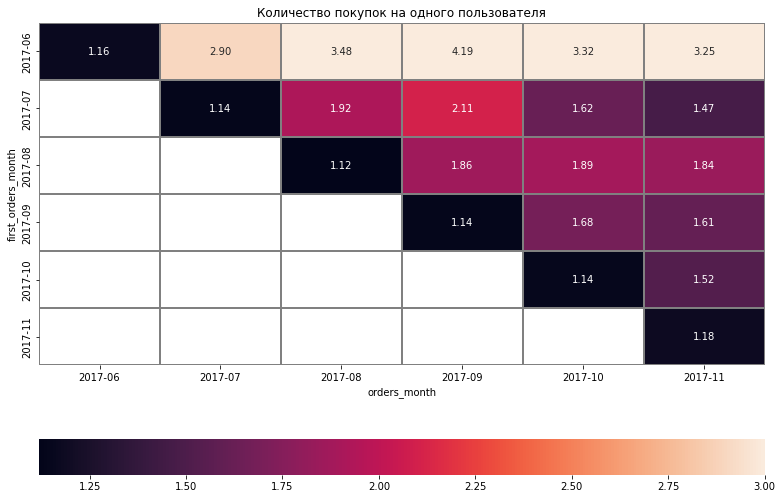

In [65]:
plt.figure(figsize=(13,9))
sns.heatmap(buy_per_user, annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=3, cbar_kws={'orientation':'horizontal'} ).set(title='Количество покупок на одного пользователя')
plt.show()

In [68]:
mean_buy = orders_grouped_by_cohorts['buy_per_user'].mean()
print(f'Среднее количество покупок {round(mean_buy,2)} заказов на одного покупателя.')

Среднее количество покупок 1.98 заказов на одного покупателя.


Мы видим что, количство покупок со временем увеличиваеться. Значит если клиент вернулся за повторной покупкой он делает это не раз

Определим средний чек на одного пользователя. Алгорит определения размера средней покупки аналогичен предидущему расчеты.

In [70]:
users = users.copy()

In [71]:
users['first_orders_month'] = users['first_orders_date'].astype('datetime64[M]').dt.strftime('%Y-%m')
users['orders_month'] = users['buy_ts'].astype('datetime64[M]').dt.strftime('%Y-%m')
users.head(3)

,buy_ts,revenue,uid,first_orders_date,first_visits_date,time_delta,first_orders_month,orders_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.000,2017-06,2017-06
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.000,2017-06,2017-06
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.000,2017-06,2017-06


In [72]:
cohort_grouped2 = users.groupby('first_orders_month').agg(
    {'uid': 'nunique', 'revenue': 'sum'}
)

cohort_grouped.head() 

,uid,revenue
first_orders_month,,
2017-06,2023,3441
2017-07,1923,2582
2017-08,1370,1822
2017-09,2581,3313
2017-10,4340,5278


In [73]:
orders_grouped_by_cohorts2 = users.groupby(
    ['first_orders_month', 'orders_month']
).agg({'revenue': 'sum', 'uid': 'nunique' })
orders_grouped_by_cohorts2

revenue   uid
first_orders_month orders_month                
2017-06            2017-06       9557.490  2023
                   2017-07        981.820    61
                   2017-08        885.340    50
                   2017-09       1931.300    54
                   2017-10       2068.580    88
                   2017-11       1487.920    67
2017-07            2017-07      11557.650  1923
                   2017-08        644.610    52
                   2017-09       1199.050    57
                   2017-10        690.310    64
                   2017-11        339.970    49
2017-08            2017-08       7228.830  1370
                   2017-09        646.630    58
                   2017-10        628.120    53
                   2017-11        536.050    44
2017-09            2017-09      14568.530  2581
                   2017-10       2884.490   130
                   2017-11       1344.520   100
2017-10            2017-10      21716.200  4340
                   2017-11       2325.210   206
2017-11            2017-11      21036.260  4081

In [74]:
orders_grouped_by_cohorts2['avrage_chek'] = orders_grouped_by_cohorts2['revenue'] / orders_grouped_by_cohorts2['uid']

In [75]:
avrage_chek = orders_grouped_by_cohorts2.pivot_table(
    index='first_orders_month',
    columns='orders_month',
    values='avrage_chek',
    aggfunc='mean',
)

Сгруппируем данные по месяцам.

In [76]:
avrage_chek

orders_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
first_orders_month,,,,,,
2017-06,4.724,16.095,17.707,35.765,23.507,22.208
2017-07,NaN,6.010,12.396,21.036,10.786,6.938
2017-08,NaN,NaN,5.277,11.149,11.851,12.183
2017-09,NaN,NaN,NaN,5.645,22.188,13.445
2017-10,NaN,NaN,NaN,NaN,5.004,11.287
2017-11,NaN,NaN,NaN,NaN,NaN,5.155


Визаулизурем данные

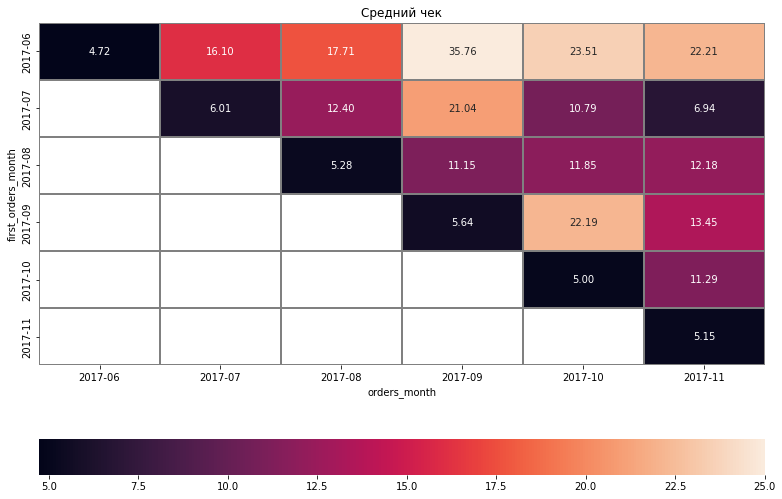

In [78]:

plt.figure(figsize=(13,9))
sns.heatmap(avrage_chek, annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=25, cbar_kws={'orientation':'horizontal'} ).set(title='Средний чек')
plt.show()

In [87]:
orders_grouped_by_cohorts3 = users.groupby(
    ['orders_month']
).agg({'revenue': 'sum', 'uid': 'nunique' })

orders_grouped_by_cohorts3['avrage_chek'] = orders_grouped_by_cohorts3['revenue'] / orders_grouped_by_cohorts3['uid']
orders_grouped_by_cohorts3['avrage_chek'].mean()


5.934349761196562

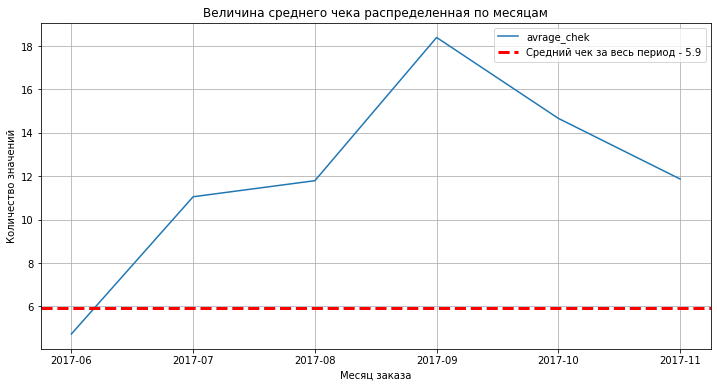

In [80]:
x = orders_grouped_by_cohorts2.groupby('orders_month')['avrage_chek'].mean()
x1 = orders_grouped_by_cohorts3['avrage_chek'].mean()
x.plot(figsize=(12,6)).set(title='Величина среднего чека распределенная по месяцам', xlabel='Месяц заказа', ylabel='Количество значений')
plt.axhline(label= 'Средний чек за весь период - {:.1f}'.format(x1), y= orders_grouped_by_cohorts3['avrage_chek'].mean(),
                linewidth=3, 
                color='r', 
                linestyle='--')
plt.grid()
plt.legend()
plt.show()

Не применяя когортный анализ (мы не определяли месяц жизни когорты) был посчитан средний чек. Для расчета применили группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Мы видим, что средний чек в первый месяц покупки значительно ниже, чем в последующие месяцы, так же мы видим, что количество клиентов в первый месяц намного больше  количества клиентов приобретающих в последующие месяцы. Предположение об привлечении клиентов по акции похоже на правду. Сайт завлекает клиентов низкими ценами. Клиенты которые делаю повторный заказ платят в среднем намного больше. Посмотрим сколько платит каждый клиент в общем. Какую прибыль он приносит сайту? Расчитаем LTV.

 Выясним, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев. Отразим изменения метрики во времени на графике;

Визуально оценим данные

In [88]:
orders['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

In [89]:
costs['dt'].describe() 

count                    2542
unique                    364
top       2017-06-01 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Диапазон дат расходов совпадает с датами заказов.
LTV удобно считать по когортам. Вспомним, что для этого нужно:
* найти дату первой покупки каждого покупателя;
* вычислить число новых покупателей за каждую дату;
* добавить дату первой покупки в таблицу с заказами;
* сгруппировать таблицу и посчитать выручку.

In [90]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]') 

In [91]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head(3)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [92]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [93]:
orders_new = pd.merge(orders,first_orders, on='uid')

orders_new.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01,2017-06-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [94]:
cohorts_ltv = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_ltv.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.490
1,2017-06-01,2017-07-01,981.820
2,2017-06-01,2017-08-01,885.340
3,2017-06-01,2017-09-01,1931.300
4,2017-06-01,2017-10-01,2068.580


Строка таблицы cohorts показывает, какую выручку принесла когорта. Например, строка 0 сообщает, что покупатели, сделавшие свой первый заказ в июне 2017 года, в этом же месяце принесли суммарно 9557.490 у.е. выручки.
С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [95]:
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01 9557.490
1        2017-06-01      2023  2017-07-01  981.820
2        2017-06-01      2023  2017-08-01  885.340
3        2017-06-01      2023  2017-09-01 1931.300
4        2017-06-01      2023  2017-10-01 2068.580


Ранее в таблице появился столбец с новыми покупателями — n_buyers. В первых 5 строках его значение не изменяется — ведь это продажи одной и той же когорты.
До расчёта LTV осталось 2 шага. Во-первых, LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность. Во-вторых, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [96]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
# Срезаем только когорты «прожившие» не менее 6 месяцев
report = report[report['first_order_month'] < '2017-12-01']
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.490,9557.490,0
1,2017-06-01,2023,2017-07-01,981.820,981.820,1
2,2017-06-01,2023,2017-08-01,885.340,885.340,2
3,2017-06-01,2023,2017-09-01,1931.300,1931.300,3
4,2017-06-01,2023,2017-10-01,2068.580,2068.580,4


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [97]:
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.490,9557.490,0,4.724
1,2017-06-01,2023,2017-07-01,981.820,981.820,1,0.485
2,2017-06-01,2023,2017-08-01,885.340,885.340,2,0.438
3,2017-06-01,2023,2017-09-01,1931.300,1931.300,3,0.955
4,2017-06-01,2023,2017-10-01,2068.580,2068.580,4,1.023


In [98]:


output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,0.485,0.438,0.955,1.023,0.736,0.950,0.582,0.553,0.606,0.571,0.257
2017-07-01,6.010,0.335,0.624,0.359,0.177,0.156,0.120,0.142,0.161,0.147,0.156,
2017-08-01,5.277,0.472,0.458,0.391,0.494,0.284,0.211,0.405,0.292,0.188,,
2017-09-01,5.645,1.118,0.521,3.976,0.401,0.647,0.702,0.243,0.184,,,
2017-10-01,5.004,0.536,0.191,0.157,0.152,0.120,0.085,0.115,,,,
2017-11-01,5.155,0.399,0.200,0.325,0.148,0.054,0.115,,,,,


In [99]:
output.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.210,5.647,6.602,7.625,8.360,9.311,9.892,10.445,11.051,11.622,11.879
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,NaN
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,NaN,NaN
2017-09-01,5.645,6.762,7.283,11.259,11.659,12.306,13.008,13.251,13.435,NaN,NaN,NaN
2017-10-01,5.004,5.539,5.731,5.888,6.040,6.160,6.245,6.360,NaN,NaN,NaN,NaN
2017-11-01,5.155,5.554,5.753,6.078,6.226,6.280,6.395,NaN,NaN,NaN,NaN,NaN


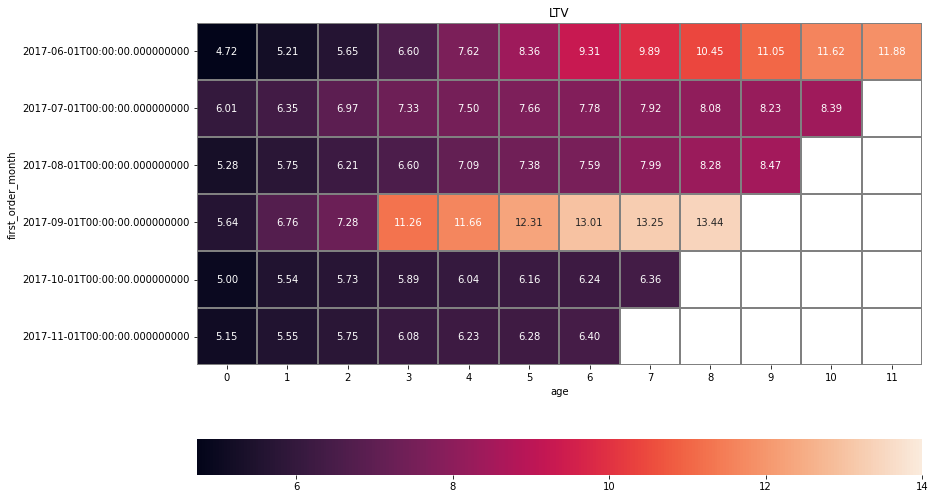

In [103]:

plt.figure(figsize=(13,9))
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=14, cbar_kws={'orientation':'horizontal'} ).set(title='LTV')
plt.show()

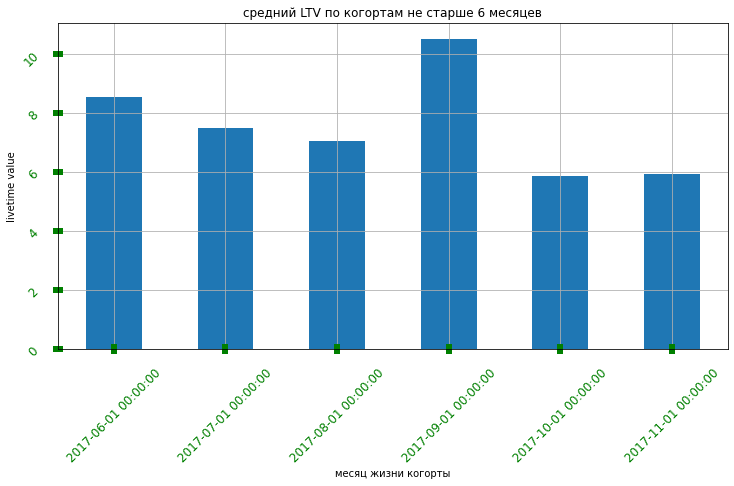

Среднее LTV в общем 7.56


In [104]:
output.cumsum(axis=1).mean(axis=1).plot(figsize=(12,6), kind='bar')
plt.title('средний LTV по когортам не старше 6 месяцев')
plt.ylabel('livetime value')
plt.xlabel('месяц жизни когорты')
plt.tick_params( axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 10,    #  Длинна делений
               width = 6,     #  Ширина делений
               color = 'g',    #  Цвет делений
               pad = 12,    #  Расстояние между черточкой и ее подписью
               labelsize = 12,    #  Размер подписи
               labelcolor = 'g',    #  Цвет подписи
            rotation = 45 )    #  Поворот подписей

 
plt.grid(True)
plt.show()
ltv_mean = output.cumsum(axis=1).mean(axis=1).mean()
print('Среднее LTV в общем {:.2f}'.format(ltv_mean))

Из графика видим, что польше всего выручки принесли покупатели совершившие первую покупку в сентябре 2017. Интересно почему?

#### Вывод

Обощив выведенные метрики электронной комерции можно сделать вывод
* Больше всего людей делают заказ в первую минуту посещения сайта. 

* В среднем на одного покупетля выходи 1,86 покупки. Сгруппировав данные по месяцам мы видим что, количство покупок со временем увеличиваеться. Значит если клиент вернулся за повторной покупкой он делает это не раз.

* Мы видим, что средний чек в первый месяц покупки значительно ниже, чем в последующие месяцы, так же мы видим, что количество клиентов в первый месяц намного больше  количества клиентов приобретающих в последующие месяцы. Предположение об привлечении клиентов по акции похоже на правду. Сайт завлекает клиентов низкими ценами. Клиенты которые делаю повторный заказ платят в среднем намного больше. 

* Среднее LTV в общем 7.56. Из графика видим, что польше всего выручки принесли покупатели совершившие первую покупку в сентябре 2017. 

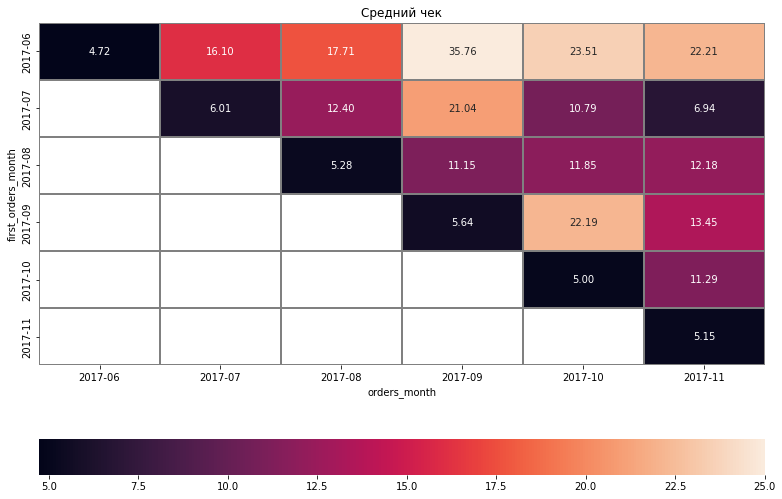

In [105]:
plt.figure(figsize=(13,9))
sns.heatmap(avrage_chek, annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=25, cbar_kws={'orientation':'horizontal'} ).set(title='Средний чек')
plt.show()

### Маркетинговые метрики

 Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрики во времени. Так же посчитаем сумммарные расходы по всем источникам и за весь период.

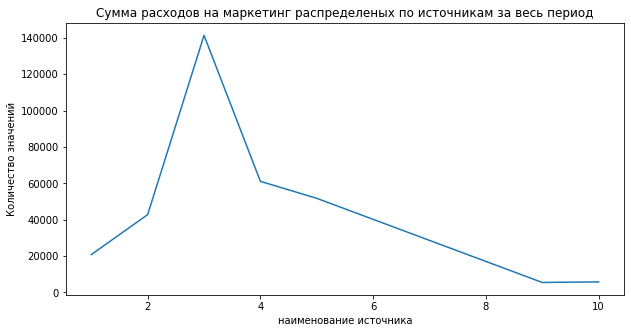

In [106]:
plt.figure(figsize=(10, 5))
costs_sum_by_sourse = costs.groupby('source_id')['costs'].sum()
  
costs_sum_by_sourse.plot(kind='line').set(title='Cумма расходов на маркетинг распределеныx по источникам за весь период', xlabel='наименование источника', ylabel='Количество значений')
plt.show()

In [108]:
visits['first_session_date'] = visits['session_date'].astype('datetime64[D]') 
visits.sample(3)

,device,end_ts,source_id,start_ts,uid,session_year,session_week,session_month,session_date,session_duration_sec,first_session_date
32428,desktop,2018-02-26 17:42:00,3,2018-02-26 17:42:00,13323389772449278121,2018,9,2,2018-02-26,0,2018-02-26
113357,desktop,2018-01-11 22:56:00,3,2018-01-11 22:51:00,671084728882128467,2018,2,1,2018-01-11,300,2018-01-11
193760,desktop,2018-03-08 23:09:00,4,2018-03-08 23:08:00,2547019170590849332,2018,10,3,2018-03-08,60,2018-03-08


In [109]:
costs['month'] = costs['month'].astype('datetime64[M]').dt.strftime('%Y-%m')

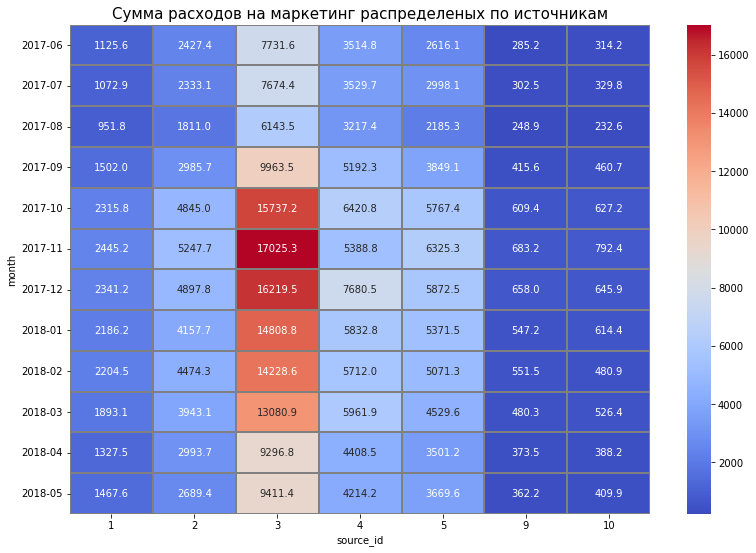

In [111]:

costs_sum_by_sourse = costs.pivot_table(
    index='month',
    columns = 'source_id',
    values='costs',
    aggfunc='sum',
)

plt.figure(figsize=(13, 9))
plt.title('Cумма расходов на маркетинг распределеныx по источникам', fontsize = 15)
sns.heatmap(costs_sum_by_sourse, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap="coolwarm") 
plt.show()


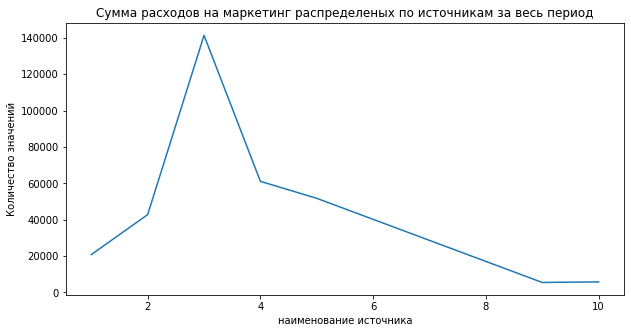

In [112]:
plt.figure(figsize=(10, 5))
costs_sum_by_sourse = costs.groupby('source_id')['costs'].sum()
  
costs_sum_by_sourse.plot(kind='line').set(title='Cумма расходов на маркетинг распределеныx по источникам за весь период', xlabel='наименование источника', ylabel='Количество значений')
plt.show()

<div class="alert alert-block alert-info">
Сравнив расходы на маркетинг по когортам и за весь период, мы видим, что они совпадают. 3 источник - имеет максимальные расходы.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Дополнительно можно убрать timestamp "00:00:00" с дат. Просьба учесть этот комментарий и для других графиков.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Молодец, что построил график расходов по источникам (но здесь лучше будет использовать линейный график для более удобного сравнения), но нужно добавить график суммарных расходов и сравнить совпадает ли динамика расходов по источникам с динамикой суммарных расходов.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Я имела ввиду построить с помощью линейного графика или .pivot_table(), .plot() и .area изменение расходов по отдельным источникам и суммарных расходов с теченеим времени.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 3:
    
Здесь удобнее воспользоваться .pivot_table(), .plot и .area() для построения графиков.
</div>

Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках

In [113]:
monthly_costs = costs.pivot_table(index =['month'], values=['costs'], aggfunc= 'sum')
monthly_costs = monthly_costs.reset_index()
monthly_costs['month'] = monthly_costs['month'].astype('datetime64[M]')

In [114]:
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.490,9557.490,0,4.724
1,2017-06-01,2023,2017-07-01,981.820,981.820,1,0.485
2,2017-06-01,2023,2017-08-01,885.340,885.340,2,0.438
3,2017-06-01,2023,2017-09-01,1931.300,1931.300,3,0.955
4,2017-06-01,2023,2017-10-01,2068.580,2068.580,4,1.023


In [115]:

report_new = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.sample(5)


,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
38,2017-09-01,2581,2018-02-01,1670.080,1670.080,5,0.647,2017-09-01,24368.910,9.442
41,2017-09-01,2581,2018-05-01,474.920,474.920,8,0.184,2017-09-01,24368.910,9.442
30,2017-08-01,1370,2018-03-01,554.860,554.860,7,0.405,2017-08-01,14790.540,10.796
56,2017-11-01,4081,2018-05-01,469.020,469.020,6,0.115,2017-11-01,37907.880,9.289
42,2017-10-01,4340,2017-10-01,21716.200,21716.200,0,5.004,2017-10-01,36322.880,8.369


In [116]:
cac = report_new['cac'].mean()
print('Cредний CAC на одного покупателя для всего проекта {:.2f} y.e.'.format(cac))

Cредний CAC на одного покупателя для всего проекта 9.41 y.e.


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, расчёт САС.
</div>

<div class="alert alert-block alert-info">
Не верно сгруппировал помесячные расходы. Пересчитал.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
На самом деле средний САС можно найти проще :)
    
costs['costs'].sum() / orders['uid'].nunique()
</div>

В задании не сказано в чем измеряеються расходы. Предположим они в тех же единицах что доходы. В противном случае нужно приводить показатели к единому курсу.

Сгруппируем данные по источникам.

In [117]:
report.head(5)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.490,9557.490,0,4.724
1,2017-06-01,2023,2017-07-01,981.820,981.820,1,0.485
2,2017-06-01,2023,2017-08-01,885.340,885.340,2,0.438
3,2017-06-01,2023,2017-09-01,1931.300,1931.300,3,0.955
4,2017-06-01,2023,2017-10-01,2068.580,2068.580,4,1.023


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Исправь, пожалуйста, ошибку в коде и я смогу продолжить ревью проекта.
</div>

In [118]:

# Соединяем таблицы по первому месяцу активности клиента и месяцу расходов
costs['month'] = costs['month'].astype('datetime64[M]')
report_source = pd.merge(
    costs, report, left_on='month', right_on='first_order_month'
)
report_source['cac'] = report_source['costs'] / report_source['n_buyers']
report_source['month'] = report_source['month'].astype('datetime64[M]').dt.strftime('%Y-%m')
cac_sum_by_sourse = report_source.pivot_table(
    index='month',
    columns = 'source_id',
    values='cac',
    aggfunc='mean',
)


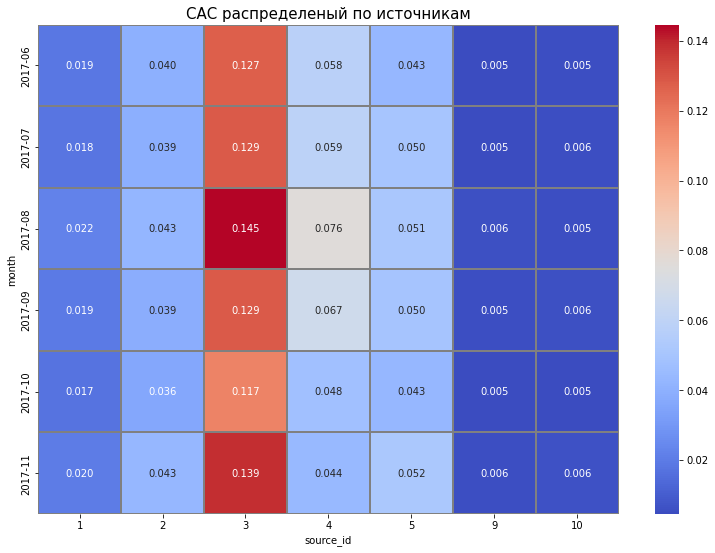

In [120]:
plt.figure(figsize=(13, 9))
plt.title('САС распределеный по источникам', fontsize = 15)
sns.heatmap(cac_sum_by_sourse, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap="coolwarm") 
plt.show()

Мы видим, что нибольшие расходы идут на 3 источник, наименьшие на 9 и 10.

Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

Для начала найдем только тех пользователей который пришли с ресурса 1.

In [121]:
visits['session_date'] = visits['session_date'].astype('datetime64[D]')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  category      
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   session_year          359400 non-null  int64         
 6   session_week          359400 non-null  int64         
 7   session_month         359400 non-null  int64         
 8   session_date          359400 non-null  datetime64[ns]
 9   session_duration_sec  359400 non-null  int64         
 10  first_session_date    359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), int64(5), uint64(1)
memory usage: 27.8 MB


In [122]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_1 = visits_sourse[visits_sourse['source_id'] == 1]
visits_sourse_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34121 entries, 6 to 359396
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   device                34121 non-null  category      
 1   end_ts                34121 non-null  datetime64[ns]
 2   source_id             34121 non-null  int64         
 3   start_ts              34121 non-null  datetime64[ns]
 4   uid                   34121 non-null  uint64        
 5   session_year          34121 non-null  int64         
 6   session_week          34121 non-null  int64         
 7   session_month         34121 non-null  int64         
 8   session_date          34121 non-null  datetime64[ns]
 9   session_duration_sec  34121 non-null  int64         
 10  first_session_date    34121 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), int64(5), uint64(1)
memory usage: 2.9 MB


Сохраним uid этих пользователй в одтельный список

In [123]:
uid_sourse_1 = visits_sourse_1['uid']
uid_sourse_1

6          6661610529277171451
11         7478054213403174082
57         9161221590185702142
61        18169507838259737849
74         3577449367987547907
                  ...         
359377    17958659650920313829
359380    17983444076084967607
359384    18095050784131706696
359390    18268369011883553090
359396    18370831553019119586
Name: uid, Length: 34121, dtype: uint64

In [124]:
users_sourse_1 = users.query('uid in @uid_sourse_1')

In [126]:
users_sourse_1['first_orders_month'] = users_sourse_1['first_orders_month'].astype('datetime64[M]')
users_sourse_1['orders_month'] = users_sourse_1['orders_month'].astype('datetime64[M]')
users_sourse_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6232 entries, 0 to 21247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              6232 non-null   datetime64[ns]
 1   revenue             6232 non-null   float64       
 2   uid                 6232 non-null   uint64        
 3   first_orders_date   6232 non-null   datetime64[ns]
 4   first_visits_date   6232 non-null   datetime64[ns]
 5   time_delta          6232 non-null   float64       
 6   first_orders_month  6232 non-null   datetime64[ns]
 7   orders_month        6232 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 438.2 KB


In [127]:
cohort_sizes_s1 = (
    users_sourse_1.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s1.columns = ['first_orders_month', 'n_buyers']
cohort_sizes_s1.head()

,first_orders_month,n_buyers
0,2017-06-01,401
1,2017-07-01,400
2,2017-08-01,288
3,2017-09-01,526
4,2017-10-01,833


In [128]:
cohorts_s1 = (
    users_sourse_1.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s1.head() 

,first_orders_month,orders_month,revenue
0,2017-06-01,2017-06-01,2563.840
1,2017-06-01,2017-07-01,881.600
2,2017-06-01,2017-08-01,755.030
3,2017-06-01,2017-09-01,1783.910
4,2017-06-01,2017-10-01,1884.060


In [129]:
report_s1 = pd.merge(cohorts_s1, cohort_sizes_s1, on = 'first_orders_month' )

In [130]:
report_s1

,first_orders_month,orders_month,revenue,n_buyers
0,2017-06-01,2017-06-01,2563.840,401
1,2017-06-01,2017-07-01,881.600,401
2,2017-06-01,2017-08-01,755.030,401
3,2017-06-01,2017-09-01,1783.910,401
4,2017-06-01,2017-10-01,1884.060,401
5,2017-06-01,2017-11-01,1362.050,401
6,2017-07-01,2017-07-01,3065.650,400
7,2017-07-01,2017-08-01,487.940,400
8,2017-07-01,2017-09-01,1118.240,400
9,2017-07-01,2017-10-01,509.360,400


In [131]:
margin_rate = 1

report_s1['gp'] = report_s1['revenue'] * margin_rate
report_s1['age'] = (
    report_s1['orders_month'] - report_s1['first_orders_month']
) / np.timedelta64(1, 'M')
report_s1['age'] = report_s1['age'].round().astype('int')

report_s1.head(5)

,first_orders_month,orders_month,revenue,n_buyers,gp,age
0,2017-06-01,2017-06-01,2563.840,401,2563.840,0
1,2017-06-01,2017-07-01,881.600,401,881.600,1
2,2017-06-01,2017-08-01,755.030,401,755.030,2
3,2017-06-01,2017-09-01,1783.910,401,1783.910,3
4,2017-06-01,2017-10-01,1884.060,401,1884.060,4


In [132]:
report_s1['ltv'] = report_s1['gp'] / report_s1['n_buyers']
report_s1

,first_orders_month,orders_month,revenue,n_buyers,gp,age,ltv
0,2017-06-01,2017-06-01,2563.840,401,2563.840,0,6.394
1,2017-06-01,2017-07-01,881.600,401,881.600,1,2.199
2,2017-06-01,2017-08-01,755.030,401,755.030,2,1.883
3,2017-06-01,2017-09-01,1783.910,401,1783.910,3,4.449
4,2017-06-01,2017-10-01,1884.060,401,1884.060,4,4.698
5,2017-06-01,2017-11-01,1362.050,401,1362.050,5,3.397
6,2017-07-01,2017-07-01,3065.650,400,3065.650,0,7.664
7,2017-07-01,2017-08-01,487.940,400,487.940,1,1.220
8,2017-07-01,2017-09-01,1118.240,400,1118.240,2,2.796
9,2017-07-01,2017-10-01,509.360,400,509.360,3,1.273


In [133]:
monthly_costs_s1 = costs.query('source_id == 1').groupby(['source_id','month'])['costs'].sum()

report_new_s1 = pd.merge(
    report_s1, monthly_costs_s1, left_on='first_orders_month', right_on='month'
)

report_new_s1['cac'] = report_new_s1['costs'] / report_new_s1['n_buyers']

report_new_s1

,first_orders_month,orders_month,revenue,n_buyers,gp,age,ltv,costs,cac
0,2017-06-01,2017-06-01,2563.840,401,2563.840,0,6.394,1125.610,2.807
1,2017-06-01,2017-07-01,881.600,401,881.600,1,2.199,1125.610,2.807
2,2017-06-01,2017-08-01,755.030,401,755.030,2,1.883,1125.610,2.807
3,2017-06-01,2017-09-01,1783.910,401,1783.910,3,4.449,1125.610,2.807
4,2017-06-01,2017-10-01,1884.060,401,1884.060,4,4.698,1125.610,2.807
5,2017-06-01,2017-11-01,1362.050,401,1362.050,5,3.397,1125.610,2.807
6,2017-07-01,2017-07-01,3065.650,400,3065.650,0,7.664,1072.880,2.682
7,2017-07-01,2017-08-01,487.940,400,487.940,1,1.220,1072.880,2.682
8,2017-07-01,2017-09-01,1118.240,400,1118.240,2,2.796,1072.880,2.682
9,2017-07-01,2017-10-01,509.360,400,509.360,3,1.273,1072.880,2.682


In [134]:
report_new_s1['romi'] = report_new_s1['ltv'] / report_new_s1['cac']
output_s1 = report_new_s1.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 
output_s1


age,0,1,2,3,4,5
first_orders_month,,,,,,
2017-06-01,2.280,3.060,3.730,5.320,6.990,8.200
2017-07-01,2.860,3.310,4.350,4.830,5.020,NaN
2017-08-01,2.190,2.750,3.220,3.670,NaN,NaN
2017-09-01,3.170,4.830,5.590,NaN,NaN,NaN
2017-10-01,2.640,3.320,NaN,NaN,NaN,NaN
2017-11-01,2.790,NaN,NaN,NaN,NaN,NaN


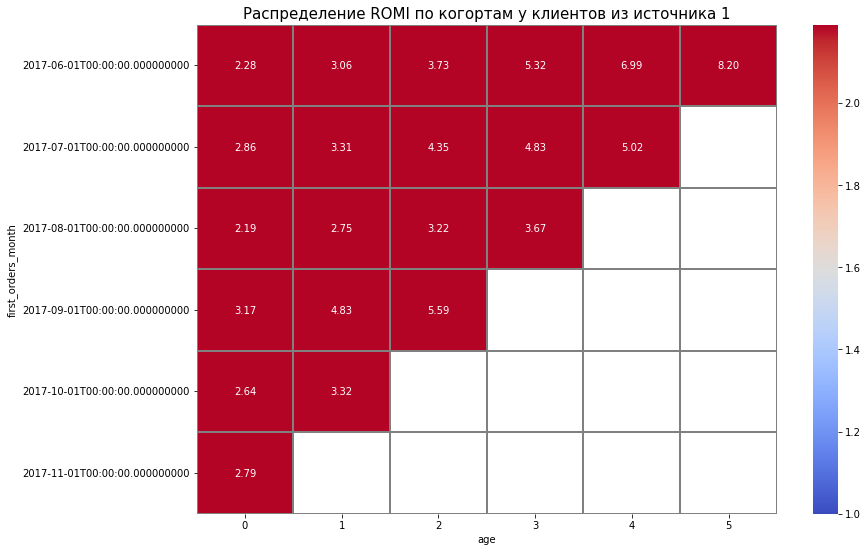

In [136]:
plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 1', fontsize = 15)
sns.heatmap(output_s1, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

<div class="alert alert-block alert-warning ">
Комментарий ревьюера v. 3:
    
Рекомендую убрать timestamp "00:00:00" с дат.
    
Подсказка как можно удалить "00:00:00" с дат: https://coderoad.ru/28247778/Python-Pandas-%D1%83%D0%B4%D0%B0%D0%BB%D0%B8%D1%82%D1%8C-%D0%B4%D0%B0%D1%82%D1%83-%D0%B8%D0%B7-timestamp
</div>

Источник 2 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 1 to 21247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              6467 non-null   datetime64[ns]
 1   revenue             6467 non-null   float64       
 2   uid                 6467 non-null   uint64        
 3   first_orders_date   6467 non-null   datetime64[ns]
 4   first_visits_date   6467 non-null   datetime64[ns]
 5   time_delta          6467 non-null   float64       
 6   first_orders_month  6467 non-null   datetime64[ns]
 7   orders_month        6467 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 454.7 KB


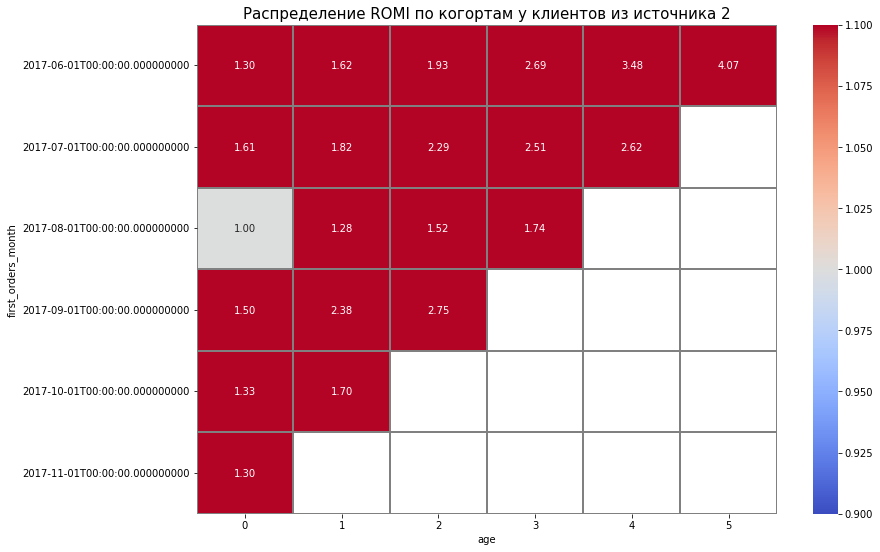

In [138]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_2 = visits_sourse[visits_sourse['source_id'] == 2]

uid_sourse_2 = visits_sourse_2['uid']

users_sourse_2 = users.query('uid in @uid_sourse_2')
users_sourse_2['first_orders_month'] = users_sourse_2['first_orders_month'].astype('datetime64[M]')
users_sourse_2['orders_month'] = users_sourse_2['orders_month'].astype('datetime64[M]')
users_sourse_2.info()
cohort_sizes_s2 = (
    users_sourse_2.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s2.columns = ['first_orders_month', 'n_buyers']

cohorts_s2 = (
    users_sourse_2.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s2.head() 
report_s2 = pd.merge(cohorts_s2, cohort_sizes_s2, on = 'first_orders_month' )
margin_rate = 1

report_s2['gp'] = report_s2['revenue'] * margin_rate
report_s2['age'] = (
    report_s2['orders_month'] - report_s2['first_orders_month']
) / np.timedelta64(1, 'M')
report_s2['age'] = report_s2['age'].round().astype('int')

report_s2.head(5)
report_s2['ltv'] = report_s2['gp'] / report_s2['n_buyers']

monthly_costs_s2 = costs.query('source_id == 2').groupby(['source_id','month'])['costs'].sum()

report_new_s2 = pd.merge(
    report_s2, monthly_costs_s2, left_on='first_orders_month', right_on='month'
)

report_new_s2['cac'] = report_new_s2['costs'] / report_new_s2['n_buyers']


report_new_s2['romi'] = report_new_s2['ltv'] / report_new_s2['cac']
output_s2 = report_new_s2.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 2', fontsize = 15)
sns.heatmap(output_s2, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

Источник 3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9279 entries, 4 to 21248
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              9279 non-null   datetime64[ns]
 1   revenue             9279 non-null   float64       
 2   uid                 9279 non-null   uint64        
 3   first_orders_date   9279 non-null   datetime64[ns]
 4   first_visits_date   9279 non-null   datetime64[ns]
 5   time_delta          9279 non-null   float64       
 6   first_orders_month  9279 non-null   datetime64[ns]
 7   orders_month        9279 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 652.4 KB


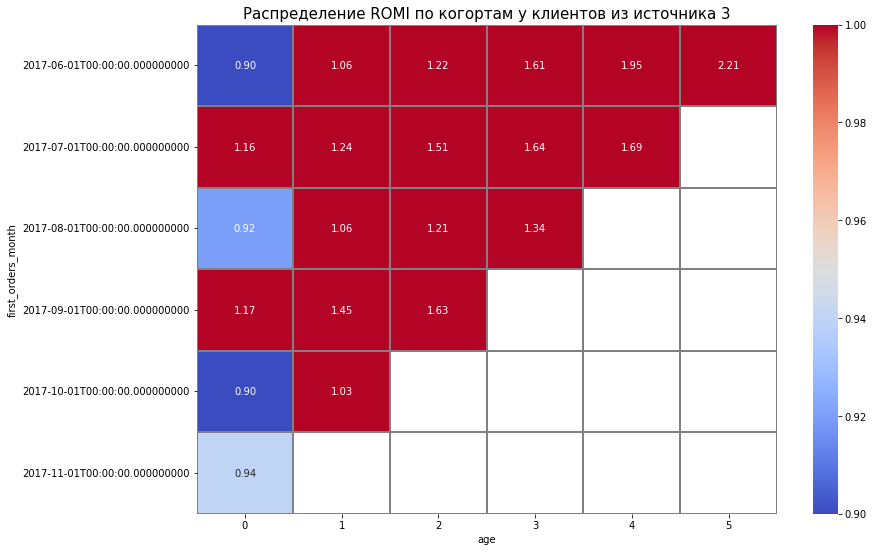

In [139]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_3 = visits_sourse[visits_sourse['source_id'] == 3]

uid_sourse_3 = visits_sourse_3['uid']

users_sourse_3 = users.query('uid in @uid_sourse_3')
users_sourse_3['first_orders_month'] = users_sourse_3['first_orders_month'].astype('datetime64[M]')
users_sourse_3['orders_month'] = users_sourse_3['orders_month'].astype('datetime64[M]')
users_sourse_3.info()
cohort_sizes_s3 = (
    users_sourse_3.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s3.columns = ['first_orders_month', 'n_buyers']

cohorts_s3 = (
    users_sourse_3.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s3.head() 
report_s3 = pd.merge(cohorts_s3, cohort_sizes_s3, on = 'first_orders_month' )
margin_rate = 1

report_s3['gp'] = report_s3['revenue'] * margin_rate
report_s3['age'] = (
    report_s3['orders_month'] - report_s3['first_orders_month']
) / np.timedelta64(1, 'M')
report_s3['age'] = report_s3['age'].round().astype('int')

report_s3.head(5)
report_s3['ltv'] = report_s3['gp'] / report_s3['n_buyers']

monthly_costs_s3 = costs.query('source_id == 3').groupby(['source_id','month'])['costs'].sum()

report_new_s3 = pd.merge(
    report_s3, monthly_costs_s3, left_on='first_orders_month', right_on='month'
)

report_new_s3['cac'] = report_new_s2['costs'] / report_new_s2['n_buyers']


report_new_s3['romi'] = report_new_s3['ltv'] / report_new_s3['cac']
output_s3 = report_new_s3.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 3', fontsize = 15)
sns.heatmap(output_s3, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

Источник 4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 7 to 21247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              9194 non-null   datetime64[ns]
 1   revenue             9194 non-null   float64       
 2   uid                 9194 non-null   uint64        
 3   first_orders_date   9194 non-null   datetime64[ns]
 4   first_visits_date   9194 non-null   datetime64[ns]
 5   time_delta          9194 non-null   float64       
 6   first_orders_month  9194 non-null   datetime64[ns]
 7   orders_month        9194 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 646.5 KB


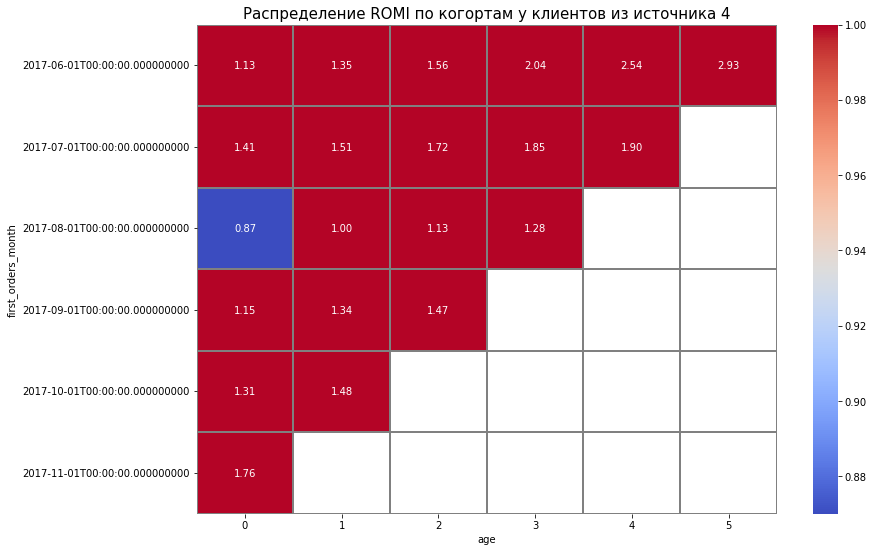

In [140]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_4 = visits_sourse[visits_sourse['source_id'] == 4]

uid_sourse_4 = visits_sourse_4['uid']

users_sourse_4 = users.query('uid in @uid_sourse_4')
users_sourse_4['first_orders_month'] = users_sourse_4['first_orders_month'].astype('datetime64[M]')
users_sourse_4['orders_month'] = users_sourse_4['orders_month'].astype('datetime64[M]')
users_sourse_4.info()
cohort_sizes_s4 = (
    users_sourse_4.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s4.columns = ['first_orders_month', 'n_buyers']

cohorts_s4 = (
    users_sourse_4.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s4.head() 
report_s4 = pd.merge(cohorts_s4, cohort_sizes_s4, on = 'first_orders_month' )
margin_rate = 1

report_s4['gp'] = report_s4['revenue'] * margin_rate
report_s4['age'] = (
    report_s4['orders_month'] - report_s4['first_orders_month']
) / np.timedelta64(1, 'M')
report_s4['age'] = report_s4['age'].round().astype('int')

report_s4.head(5)
report_s4['ltv'] = report_s4['gp'] / report_s4['n_buyers']

monthly_costs_s4 = costs.query('source_id == 4').groupby(['source_id','month'])['costs'].sum()

report_new_s4 = pd.merge(
    report_s4, monthly_costs_s4, left_on='first_orders_month', right_on='month'
)

report_new_s4['cac'] = report_new_s4['costs'] / report_new_s4['n_buyers']


report_new_s4['romi'] = report_new_s4['ltv'] / report_new_s4['cac']
output_s4 = report_new_s4.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 4', fontsize = 15)
sns.heatmap(output_s4, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

Источник 5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7452 entries, 6 to 21247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              7452 non-null   datetime64[ns]
 1   revenue             7452 non-null   float64       
 2   uid                 7452 non-null   uint64        
 3   first_orders_date   7452 non-null   datetime64[ns]
 4   first_visits_date   7452 non-null   datetime64[ns]
 5   time_delta          7452 non-null   float64       
 6   first_orders_month  7452 non-null   datetime64[ns]
 7   orders_month        7452 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 524.0 KB


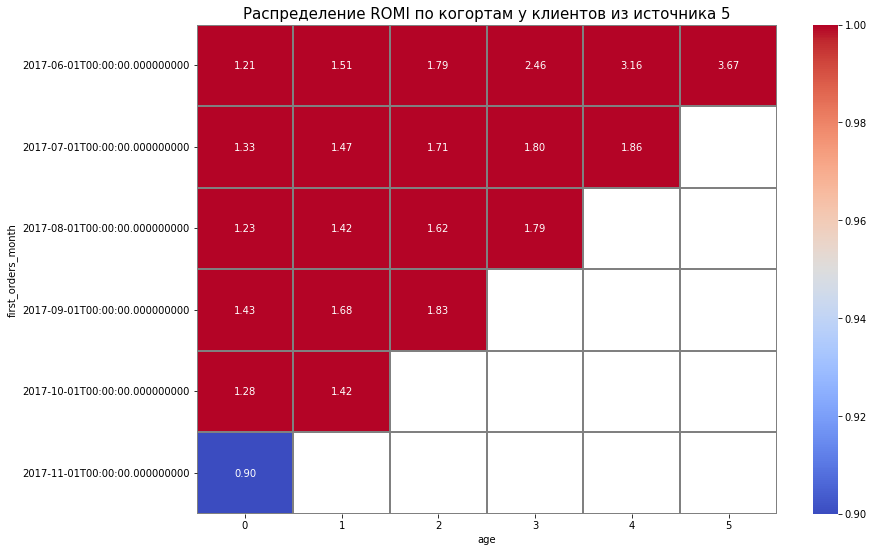

In [141]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_5 = visits_sourse[visits_sourse['source_id'] == 5]

uid_sourse_5 = visits_sourse_5['uid']

users_sourse_5 = users.query('uid in @uid_sourse_5')
users_sourse_5['first_orders_month'] = users_sourse_5['first_orders_month'].astype('datetime64[M]')
users_sourse_5['orders_month'] = users_sourse_5['orders_month'].astype('datetime64[M]')
users_sourse_5.info()
cohort_sizes_s5 = (
    users_sourse_5.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s5.columns = ['first_orders_month', 'n_buyers']

cohorts_s5 = (
    users_sourse_5.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s5.head() 
report_s5 = pd.merge(cohorts_s5, cohort_sizes_s5, on = 'first_orders_month' )
margin_rate = 1

report_s5['gp'] = report_s5['revenue'] * margin_rate
report_s5['age'] = (
    report_s5['orders_month'] - report_s5['first_orders_month']
) / np.timedelta64(1, 'M')
report_s5['age'] = report_s5['age'].round().astype('int')


report_s5['ltv'] = report_s5['gp'] / report_s5['n_buyers']

monthly_costs_s5 = costs.query('source_id == 5').groupby(['source_id','month'])['costs'].sum()

report_new_s5 = pd.merge(
    report_s5, monthly_costs_s5, left_on='first_orders_month', right_on='month'
)

report_new_s5['cac'] = report_new_s5['costs'] / report_new_s5['n_buyers']


report_new_s5['romi'] = report_new_s5['ltv'] / report_new_s5['cac']
output_s5 = report_new_s5.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 5', fontsize = 15)
sns.heatmap(output_s5, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

Источник 9

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 14 to 21243
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              2223 non-null   datetime64[ns]
 1   revenue             2223 non-null   float64       
 2   uid                 2223 non-null   uint64        
 3   first_orders_date   2223 non-null   datetime64[ns]
 4   first_visits_date   2223 non-null   datetime64[ns]
 5   time_delta          2223 non-null   float64       
 6   first_orders_month  2223 non-null   datetime64[ns]
 7   orders_month        2223 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 156.3 KB


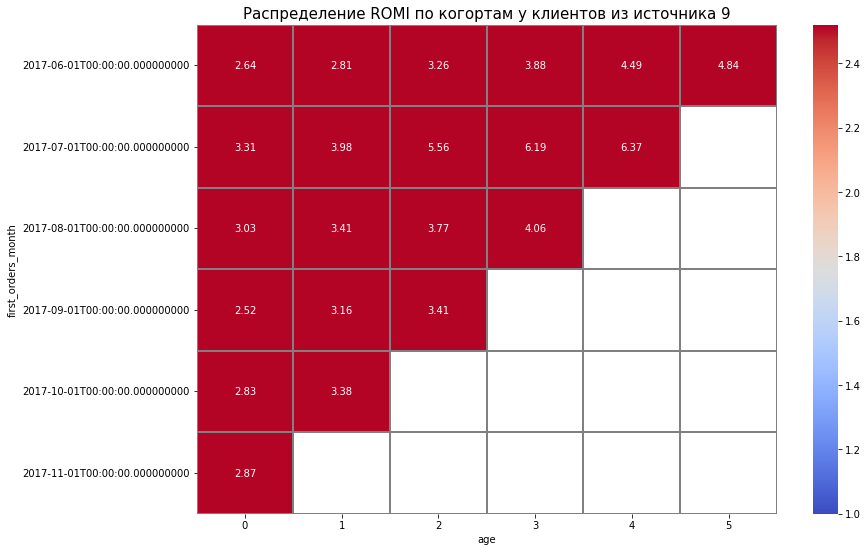

In [142]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_9 = visits_sourse[visits_sourse['source_id'] == 9]

uid_sourse_9 = visits_sourse_9['uid']

users_sourse_9 = users.query('uid in @uid_sourse_9')
users_sourse_9['first_orders_month'] = users_sourse_9['first_orders_month'].astype('datetime64[M]')
users_sourse_9['orders_month'] = users_sourse_9['orders_month'].astype('datetime64[M]')
users_sourse_9.info()
cohort_sizes_s9 = (
    users_sourse_9.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s9.columns = ['first_orders_month', 'n_buyers']

cohorts_s9 = (
    users_sourse_9.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s9.head() 
report_s9 = pd.merge(cohorts_s9, cohort_sizes_s9, on = 'first_orders_month' )
margin_rate = 1

report_s9['gp'] = report_s9['revenue'] * margin_rate
report_s9['age'] = (
    report_s9['orders_month'] - report_s9['first_orders_month']
) / np.timedelta64(1, 'M')
report_s9['age'] = report_s9['age'].round().astype('int')


report_s9['ltv'] = report_s9['gp'] / report_s9['n_buyers']

monthly_costs_s9 = costs.query('source_id == 9').groupby(['source_id','month'])['costs'].sum()

report_new_s9 = pd.merge(
    report_s9, monthly_costs_s9, left_on='first_orders_month', right_on='month'
)

report_new_s9['cac'] = report_new_s9['costs'] / report_new_s9['n_buyers']


report_new_s9['romi'] = report_new_s9['ltv'] / report_new_s9['cac']
output_s9 = report_new_s9.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 9', fontsize = 15)
sns.heatmap(output_s9, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

Источник 10

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 25 to 21236
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   buy_ts              1060 non-null   datetime64[ns]
 1   revenue             1060 non-null   float64       
 2   uid                 1060 non-null   uint64        
 3   first_orders_date   1060 non-null   datetime64[ns]
 4   first_visits_date   1060 non-null   datetime64[ns]
 5   time_delta          1060 non-null   float64       
 6   first_orders_month  1060 non-null   datetime64[ns]
 7   orders_month        1060 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(2), uint64(1)
memory usage: 74.5 KB


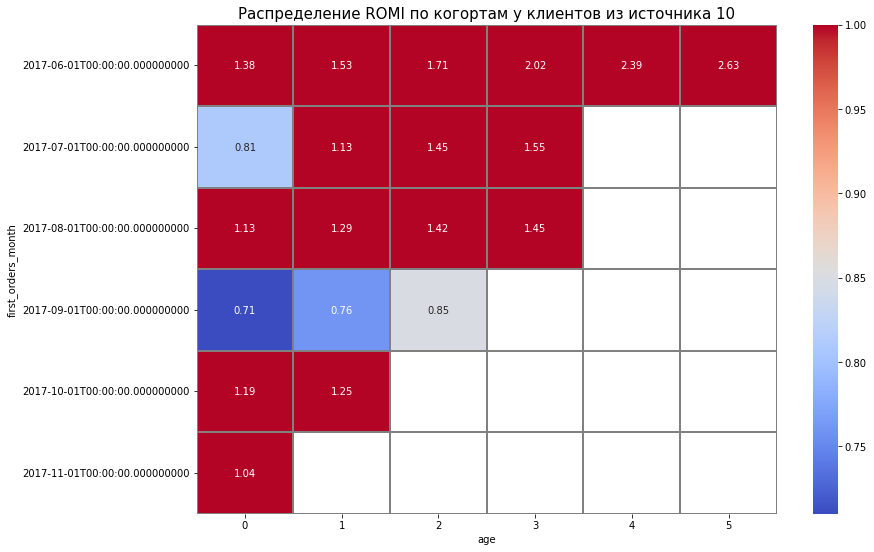

In [143]:
visits_sourse = visits[visits['first_session_date'] == visits['session_date']]
visits_sourse_10 = visits_sourse[visits_sourse['source_id'] == 10]

uid_sourse_10 = visits_sourse_10['uid']

users_sourse_10 = users.query('uid in @uid_sourse_10')
users_sourse_10['first_orders_month'] = users_sourse_10['first_orders_month'].astype('datetime64[M]')
users_sourse_10['orders_month'] = users_sourse_10['orders_month'].astype('datetime64[M]')
users_sourse_10.info()
cohort_sizes_s10 = (
    users_sourse_10.groupby('first_orders_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes_s10.columns = ['first_orders_month', 'n_buyers']

cohorts_s10 = (
    users_sourse_10.groupby(['first_orders_month', 'orders_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts_s10.head() 
report_s10 = pd.merge(cohorts_s10, cohort_sizes_s10, on = 'first_orders_month' )
margin_rate = 1

report_s10['gp'] = report_s10['revenue'] * margin_rate
report_s10['age'] = (
    report_s10['orders_month'] - report_s10['first_orders_month']
) / np.timedelta64(1, 'M')
report_s10['age'] = report_s10['age'].round().astype('int')


report_s10['ltv'] = report_s10['gp'] / report_s10['n_buyers']

monthly_costs_s10 = costs.query('source_id == 10').groupby(['source_id','month'])['costs'].sum()

report_new_s10 = pd.merge(
    report_s10, monthly_costs_s10, left_on='first_orders_month', right_on='month'
)

report_new_s10['cac'] = report_new_s10['costs'] / report_new_s10['n_buyers']


report_new_s10['romi'] = report_new_s10['ltv'] / report_new_s10['cac']
output_s10 = report_new_s10.pivot_table(
    index='first_orders_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

plt.figure(figsize=(13, 9))
plt.title('Распределение ROMI по когортам у клиентов из источника 10', fontsize = 15)
sns.heatmap(output_s10, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="coolwarm", vmax=1) 
plt.show()

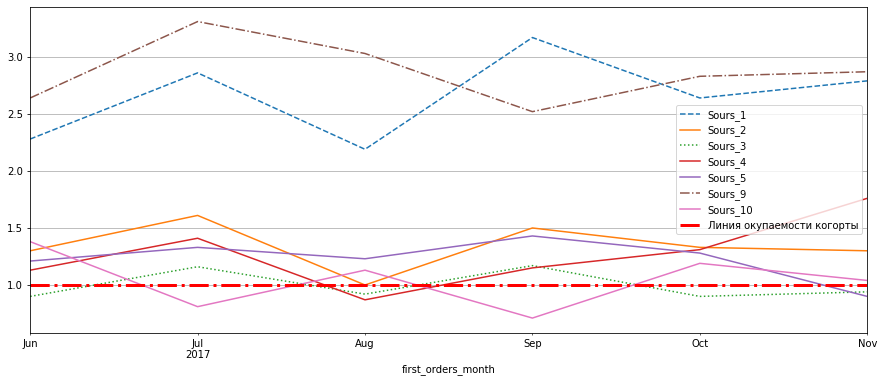

Среднее ROMI по Sours_1  - 2.655.
Среднее ROMI по Sours_2  - 1.34.
Среднее ROMI по Sours_3  - 0.9983333333333334.
Среднее ROMI по Sours_4  - 1.2716666666666667.
Среднее ROMI по Sours_5  - 1.2300000000000002.
Среднее ROMI по Sours_9  - 2.8666666666666667.
Среднее ROMI по Sours_10 - 1.0433333333333332.


In [147]:
plt.figure(figsize=(15,6))

output_s1[0].plot(linestyle = '--', label='Sours_1')
output_s2[0].plot(label='Sours_2')
output_s3[0].plot(linestyle = ':', label='Sours_3') 
output_s4[0].plot(label='Sours_4')
output_s5[0].plot(label='Sours_5')
output_s9[0].plot(linestyle = '-.', label='Sours_9')
output_s10[0].plot(label='Sours_10')
plt.axhline(label= 'Линия окупаемости когорты', y= 1,
                linewidth=3, 
                color='r', 
                linestyle='-.')
#plt.text('2017-09-01', 2, output_s3[0].mean())
plt.grid()
plt.legend()
plt.show()
print('Среднее ROMI по Sours_1  - {}.'.format(output_s1[0].mean()))
print('Среднее ROMI по Sours_2  - {}.'.format(output_s2[0].mean()))
print('Среднее ROMI по Sours_3  - {}.'.format(output_s3[0].mean()))
print('Среднее ROMI по Sours_4  - {}.'.format(output_s4[0].mean()))
print('Среднее ROMI по Sours_5  - {}.'.format(output_s5[0].mean()))
print('Среднее ROMI по Sours_9  - {}.'.format(output_s9[0].mean()))
print('Среднее ROMI по Sours_10 - {}.'.format(output_s10[0].mean()))

#### Вывод

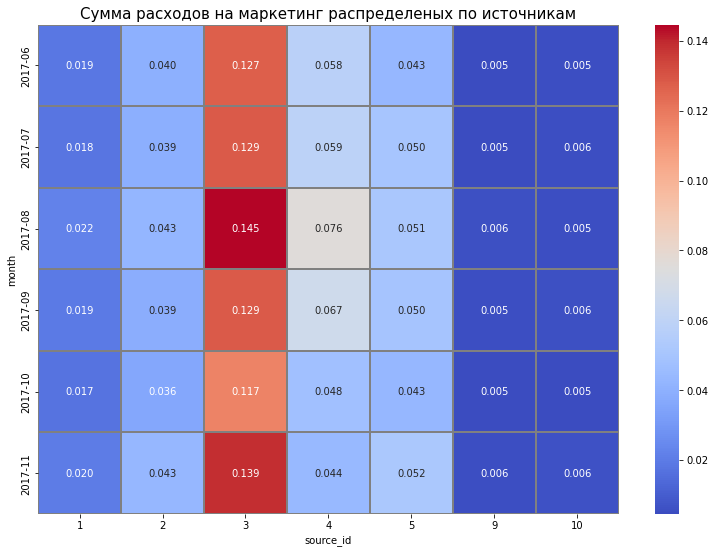

In [148]:
plt.figure(figsize=(13, 9))
plt.title('Cумма расходов на маркетинг распределеныx по источникам', fontsize = 15)
sns.heatmap(cac_sum_by_sourse, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap="coolwarm") 
plt.show()

Из таблицы мы видим, что самые большие расходы на маркетинг приносит 3 источник. Минимальные расходы на 9 и 10 источнике.

In [149]:
print('Cредние затраты (САС) на одного покупателя для всего проекта {:.2f} y.e.'.format(cac))

Cредние затраты (САС) на одного покупателя для всего проекта 9.41 y.e.


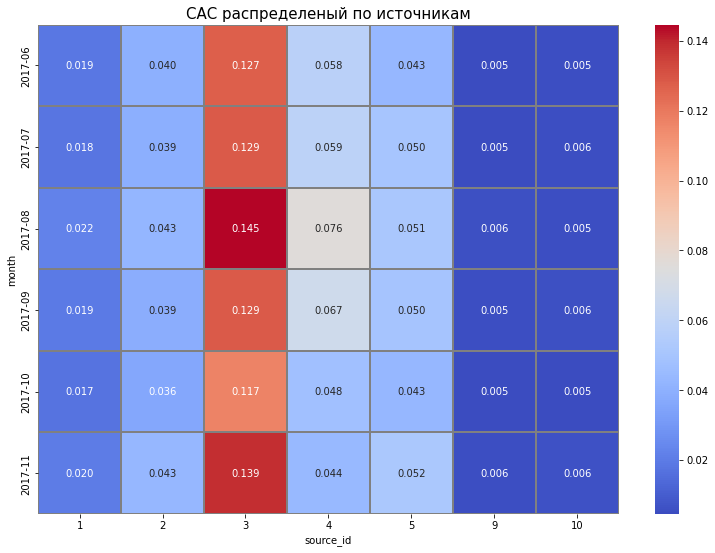

In [150]:
plt.figure(figsize=(13, 9))
plt.title('САС распределеный по источникам', fontsize = 15)
sns.heatmap(cac_sum_by_sourse, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap="coolwarm") 
plt.show()

Мы видим что САС на третьем источнике также самый большой. На 9 и 10 также минимальные значения.

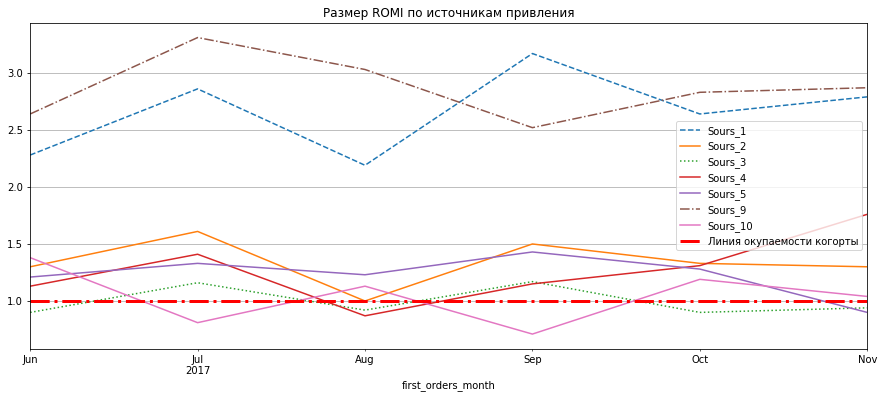

Среднее ROMI по Sours_1  - 2.655.
Среднее ROMI по Sours_2  - 1.34.
Среднее ROMI по Sours_3  - 0.9983333333333334.
Среднее ROMI по Sours_4  - 1.2716666666666667.
Среднее ROMI по Sours_5  - 1.2300000000000002.
Среднее ROMI по Sours_9  - 2.8666666666666667.
Среднее ROMI по Sours_10 - 1.0433333333333332.


In [152]:
plt.figure(figsize=(15,6))
plt.xlabel ='наименование когорты'
plt.title('Размер ROMI по источникам привления')
output_s1[0].plot(linestyle = '--', label='Sours_1')
output_s2[0].plot(label='Sours_2')
output_s3[0].plot(linestyle = ':', label='Sours_3') 
output_s4[0].plot(label='Sours_4')
output_s5[0].plot(label='Sours_5')
output_s9[0].plot(linestyle = '-.', label='Sours_9')
output_s10[0].plot(label='Sours_10')
plt.axhline(label= 'Линия окупаемости когорты', y= 1,
                linewidth=3, 
                color='r', 
                linestyle='-.')
#plt.text('2017-09-01', 2, output_s3[0].mean())
plt.grid()
plt.legend()
plt.show()
print('Среднее ROMI по Sours_1  - {}.'.format(output_s1[0].mean()))
print('Среднее ROMI по Sours_2  - {}.'.format(output_s2[0].mean()))
print('Среднее ROMI по Sours_3  - {}.'.format(output_s3[0].mean()))
print('Среднее ROMI по Sours_4  - {}.'.format(output_s4[0].mean()))
print('Среднее ROMI по Sours_5  - {}.'.format(output_s5[0].mean()))
print('Среднее ROMI по Sours_9  - {}.'.format(output_s9[0].mean()))
print('Среднее ROMI по Sours_10 - {}.'.format(output_s10[0].mean()))

ROMI – это показатель рентабельности рекламных кампаний и в целом инвестиций в маркетинговую деятельность. Из рисунка мы видим наибольшие показатели у 1 и 9 источника, наименьшие у 3. Средние показатели по источникам это так же подтверждают.

### Вывод

Главная наша цель "Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет."
Что у нас получилось:
* Нужно отказаться от 3 источника трафика, он в среднем не окупается.
* Эти расходы можно распределить на 1 и 9 источник. Они приносят больше всего прибыли на каждый затраченный рубль.
Так же вы выявили сезонность в доходах сайта. К новому году становиться больше клиентов, так же увеличиваться средний чек. 